<a href="https://colab.research.google.com/github/rinazbelhaj/EVA/blob/master/Project%206/Assignment%206A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

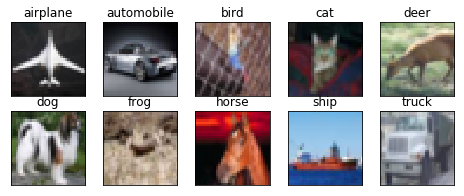

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Base Model

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 15s 39ms/step - loss: 1.8468 - acc: 0.2948 - val_loss: 1.4807 - val_acc: 0.4482
Epoch 2/50
390/390 [==============================] - 9s 23ms/step - loss: 1.3568 - acc: 0.5084 - val_loss: 1.1420 - val_acc: 0.5876
Epoch 3/50
390/390 [==============================] - 9s 23ms/step - loss: 1.1362 - acc: 0.6007 - val_loss: 1.0234 - val_acc: 0.6323
Epoch 4/50
390/390 [==============================] - 9s 23ms/step - loss: 0.9949 - acc: 0.6516 - val_loss: 0.9279 - val_acc: 0.6739
Epoch 5/50
390/390 [==============================] - 9s 23ms/step - loss: 0.8929 - acc: 0.6902 - val_loss: 0.7903 - val_acc: 0.7284
Epoch 6/50
390/390 [==============================] - 9s 23ms/step - loss: 0.8121 - acc: 0.7189 - val_loss: 0.7381 - val_acc: 0.7458
Epoch 7/50
390/390 [==============================] - 9s 23ms/step - loss: 0.7585 - acc: 0.7386 - val_loss: 0.7109 - val_acc: 0.7593
Epoch 8/50
390/390 [==============================] - 9s 23ms/step -

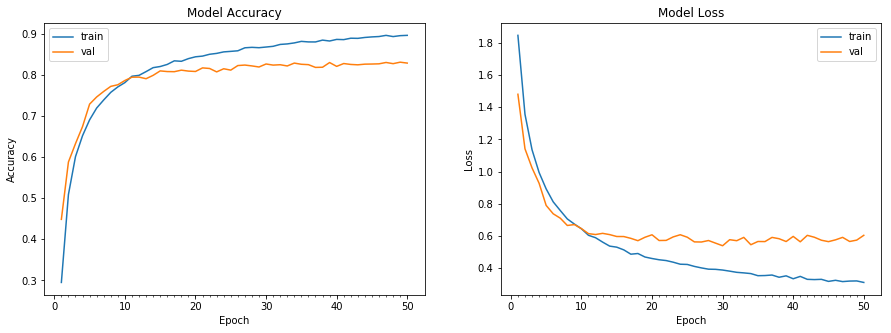

Accuracy on test data is: 82.82


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Modified Network

1.   Remove dense
2.   Added layers required to reach RF
3.   Bottleneck layers added to reduce parameters
4.   Dropouts added to reduce overfitting
5.   Acheive  accuracy more than the base accuracy in less number 100 epochs



In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

# Define the model
model = Sequential()

# Jump - 1
model.add(Conv2D(32,  (3, 3), activation='relu',padding='same',input_shape=(32,32,3), name='conv_1')) # RF - 3
model.add(Conv2D(64,  (3, 3), activation='relu',padding='same', name='conv_2')) # RF - 5
model.add(Conv2D(128, (3, 3), activation='relu',padding='same', name='conv_3')) # RF - 7
model.add(Conv2D(32,  (1, 1), activation='relu',padding='same', name='conv_4')) # RF - 7
model.add(MaxPooling2D(pool_size=(2, 2), name='pool_1')) # RF - 8
model.add(Dropout(0.10,name='dropout_1')) # RF - 8

# Jump - 2
model.add(Conv2D(32,  (3, 3), activation='relu',padding='same', name='conv_5')) # RF - 12
model.add(Conv2D(64,  (3, 3), activation='relu',padding='same', name='conv_6')) # RF - 16
model.add(Conv2D(128, (3, 3), activation='relu',padding='same', name='conv_7')) # RF - 20
model.add(Conv2D(32,  (1, 1), activation='relu',padding='same', name='conv_8')) # RF - 20
model.add(MaxPooling2D(pool_size=(2, 2), name='pool_2')) # RF - 22
model.add(Dropout(0.10,name='dropout_2')) # RF - 22

# Jump - 4
model.add(Conv2D(32,  (3, 3), activation='relu',padding='same', name='conv_9'))  # RF - 30
model.add(Conv2D(64,  (3, 3), activation='relu',padding='same', name='conv_10')) # RF - 38
model.add(Conv2D(128, (3, 3), activation='relu',padding='same', name='conv_11')) # RF - 46
model.add(Conv2D(32,  (1, 1), activation='relu',padding='same', name='conv_12')) # RF - 46

model.add(Conv2D(64,  (3, 3), activation='relu',padding='valid', name='conv_13')) # RF - 54
model.add(Conv2D(128, (3, 3), activation='relu',padding='valid', name='conv_14')) # RF - 62
model.add(Conv2D(10,  (4, 4), activation= None ,padding='valid', name='conv_15')) # RF - 74
model.add(Flatten(name="flatten"))
model.add(Activation('softmax', name='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


W0620 11:12:44.750465 140691442657152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0620 11:12:44.768581 140691442657152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 11:12:44.774119 140691442657152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0620 11:12:44.827365 140691442657152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0620 11:12:44.833873 140691442657152 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv_2 (Conv2D)              (None, 32, 32, 64)        18496     
_________________________________________________________________
conv_3 (Conv2D)              (None, 32, 32, 128)       73856     
_________________________________________________________________
conv_4 (Conv2D)              (None, 32, 32, 32)        4128      
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv_5 (Conv2D)              (None, 16, 16, 32)        9248      
__________

W0620 11:12:53.570075 140691442657152 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
390/390 [==============================] - 18s 47ms/step - loss: 1.7828 - acc: 0.3369 - val_loss: 1.4792 - val_acc: 0.4490
Epoch 2/100
390/390 [==============================] - 15s 38ms/step - loss: 1.3442 - acc: 0.5092 - val_loss: 1.1906 - val_acc: 0.5625
Epoch 3/100
390/390 [==============================] - 15s 38ms/step - loss: 1.1456 - acc: 0.5892 - val_loss: 1.1024 - val_acc: 0.6023
Epoch 4/100
390/390 [==============================] - 15s 38ms/step - loss: 0.9908 - acc: 0.6457 - val_loss: 0.9683 - val_acc: 0.6559
Epoch 5/100
390/390 [==============================] - 15s 38ms/step - loss: 0.8876 - acc: 0.6844 - val_loss: 0.8906 - val_acc: 0.6845
Epoch 6/100
390/390 [==============================] - 15s 38ms/step - loss: 0.8112 - acc: 0.7130 - val_loss: 0.8564 - val_acc: 0.6988
Epoch 7/100
390/390 [==============================] - 15s 39ms/step - loss: 0.7350 - acc: 0.7396 - val_loss: 0.8498 - val_acc: 0.7112
Epoch 8/100
390/390 [==============================] - 

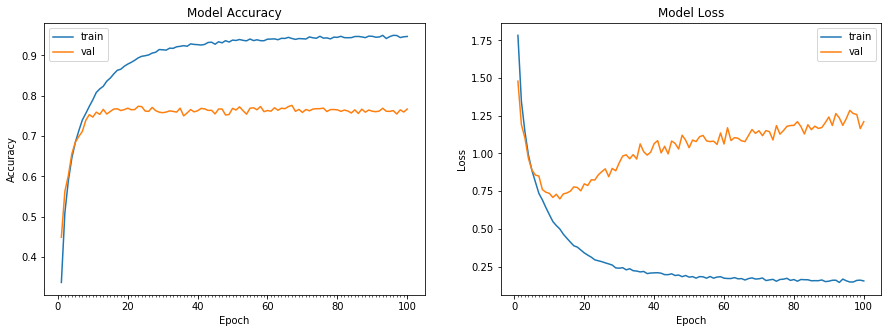

Accuracy on test data is: 76.68


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 steps_per_epoch = train_features.shape[0]//128, epochs = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))